### This script contains the following sections:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis and comments

## 1. Imports

In [8]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
path = r'C:\Users\\Achievement 6\data_emergency_ex6.1'
data_path = r'C:\Users\\data_emergency_ex6.1\Data'

In [10]:
#import df
df = pd.read_csv(os.path.join(data_path,'Prepared','3.data_join_facilities.csv'))
df.head(2)

,year,oshpd_id,county_number,county_name,facility_name,dba_address1,dba_city,dba_zip_code,license_category_desc,teaching_hospital_desc,...,medi_cal,medicare,other_payer,private_coverage,selfpay,all_other,english,spanish,ed_admit,ed_visit
0,2012,106010735,1,ALAMEDA,ALAMEDA HOSPITAL,2070 CLINTON,ALAMEDA,94501,General Acute Care,0.0,...,549.0,2740.0,3469.0,4339.0,0.0,522.0,12918.0,287.0,2595.0,13727.0
1,2012,106010739,1,ALAMEDA,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,2450 ASHBY STREET,BERKELEY,94705,General Acute Care,0.0,...,8613.0,5707.0,1877.0,12926.0,0.0,534.0,33867.0,941.0,6047.0,35342.0


In [11]:
df.isna().sum()

year                        0
oshpd_id                    0
county_number               0
county_name                 0
facility_name               0
dba_address1                0
dba_city                    0
dba_zip_code                0
license_category_desc       0
teaching_hospital_desc      0
licensed_bed_size           0
mssa_designation          325
er_service_level            0
sex_male                    0
sex_female                  0
sex_unk                     0
age_01_09                   0
age_10_19                   0
age_20_29                   0
age_30_39                   0
age_40_49                   0
age_50_59                   0
age_60_69                   0
age_70_79                   0
age_80_                     0
age_under_1                 0
age_unknown                 0
asian_pacific_island        0
black                       0
hispanic                    0
native_american_eski        0
other_race                  0
unknown_race                0
white     

In [12]:
df.loc[df['ed_admit'].isna()]

,year,oshpd_id,county_number,county_name,facility_name,dba_address1,dba_city,dba_zip_code,license_category_desc,teaching_hospital_desc,...,medi_cal,medicare,other_payer,private_coverage,selfpay,all_other,english,spanish,ed_admit,ed_visit
270,2012,106410828,41,SAN MATEO,SETON COASTSIDE,600 MARINE BOULEVARD,MOSS BEACH,94038,General Acute Care,0.0,...,1059.0,470.0,207.0,1040.0,0.0,51.0,2215.0,834.0,NaN,3100.0
595,2013,106410828,41,SAN MATEO,SETON COASTSIDE,600 MARINE BOULEVARD,MOSS BEACH,94038,General Acute Care,0.0,...,878.0,549.0,213.0,986.0,0.0,44.0,2144.0,779.0,NaN,2967.0
1562,2016,106410828,41,SAN MATEO,SETON COASTSIDE,600 MARINE BOULEVARD,MOSS BEACH,94038,Hospital,0.0,...,1231.0,359.0,122.0,764.0,229.0,31.0,1874.0,804.0,NaN,2709.0
1882,2017,106410828,41,SAN MATEO,SETON COASTSIDE,600 MARINE BOULEVARD,MOSS BEACH,94038,General Acute Care,0.0,...,1156.0,404.0,122.0,812.0,185.0,31.0,1942.0,707.0,NaN,2680.0
2204,2018,106410828,41,SAN MATEO,SETON COASTSIDE,600 MARINE BOULEVARD,MOSS BEACH,94038,General Acute Care,0.0,...,1122.0,397.0,132.0,687.0,176.0,31.0,1760.0,729.0,NaN,2520.0
2522,2019,106410828,41,SAN MATEO,SETON COASTSIDE,600 Marine Blvd,Moss Beach,94038,General Acute Care,0.0,...,965.0,362.0,104.0,622.0,169.0,20.0,1573.0,627.0,NaN,2222.0
2634,2020,106190045,19,LOS ANGELES,CATALINA ISLAND MEDICAL CENTER,100 Falls Canyon Rd,Avalon,90704,General Acute Care,0.0,...,416.0,239.0,67.0,600.0,147.0,6.0,1205.0,256.0,NaN,1469.0
2836,2020,106410828,41,SAN MATEO,AHMC SETON MEDICAL CENTER COASTSIDE,600 Marine Blvd,Moss Beach,94038,General Acute Care,0.0,...,392.0,171.0,40.0,460.0,93.0,12.0,860.0,283.0,NaN,1156.0


In [13]:
df.loc[df['oshpd_id'] == '']

,year,oshpd_id,county_number,county_name,facility_name,dba_address1,dba_city,dba_zip_code,license_category_desc,teaching_hospital_desc,...,medi_cal,medicare,other_payer,private_coverage,selfpay,all_other,english,spanish,ed_admit,ed_visit


## 2. Cleaning

In [14]:
df.shape

(2891, 53)

In [15]:
print(df.columns)

Index(['year', 'oshpd_id', 'county_number', 'county_name', 'facility_name',
       'dba_address1', 'dba_city', 'dba_zip_code', 'license_category_desc',
       'teaching_hospital_desc', 'licensed_bed_size', 'mssa_designation',
       'er_service_level', 'sex_male', 'sex_female', 'sex_unk', 'age_01_09',
       'age_10_19', 'age_20_29', 'age_30_39', 'age_40_49', 'age_50_59',
       'age_60_69', 'age_70_79', 'age_80_', 'age_under_1', 'age_unknown',
       'asian_pacific_island', 'black', 'hispanic', 'native_american_eski',
       'other_race', 'unknown_race', 'white', 'acute_care',
       'against_medical_advice', 'died', 'hospice_care', 'home_health_service',
       'residential_care', 'routine', 'psychiatric_care', 'sn_ic_care',
       'medi_cal', 'medicare', 'other_payer', 'private_coverage', 'selfpay',
       'all_other', 'english', 'spanish', 'ed_admit', 'ed_visit'],
      dtype='object')


In [16]:
# df_reg = df[['hispanic','against_medical_advice']] #not needed since reshape will select specific variables

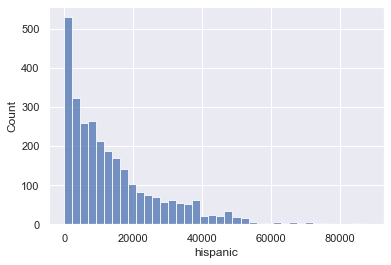

In [17]:
sns.histplot(df['hispanic']);

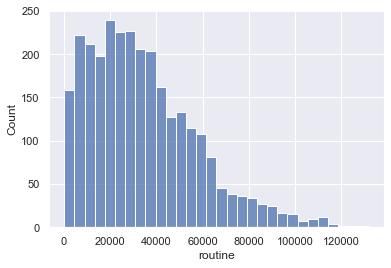

In [18]:
sns.histplot(df['routine']); 

In [19]:
# print(df['hispanic'].mean)
df[['hispanic','routine']].describe()

,hispanic,routine
count,2891.000000,2891.000000
mean,14472.830854,34293.858872
std,14357.158718,23450.253411
min,0.000000,142.000000
25%,3532.500000,16422.000000
50%,10016.000000,30320.000000
75%,20493.500000,47831.000000
max,88227.000000,131956.000000


Outliers cannot be deleted in this case, especially for *routine* dispositions/discharges since I cannot be sure that the high values are indeed outliers. Facilities with higher bed capacities and ED admissions may have more encounters where patients are routinely. Addtionally, the data shows the encounters but not the repeated encounters.

## 3. Data prep

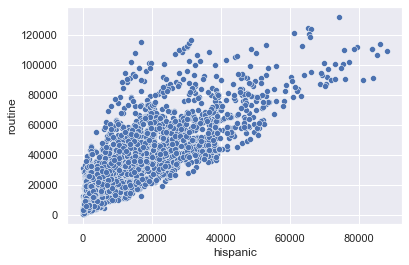

In [20]:
#View relationship between vriables of interest

sns.scatterplot(x = 'hispanic', y = 'routine', data = df);

**Hypothesis**

As the number of encounters for hispanic patient increase, routine disposition encounter also increase.

In [21]:
#rehsape the data
X = df['hispanic'].values.reshape(-1,1)
y = df['routine'].values.reshape(-1,1)
# y = df['routine'].values.reshape(2891,1) #alternative

In [22]:

len(X) == len(y)

True

In [23]:
print("X: ",X, "y :" ,y)

X:  [[  173.]
 [ 3419.]
 [15489.]
 ...
 [ 8400.]
 [ 7095.]
 [13596.]] y : [[12462.]
 [33653.]
 [38135.]
 ...
 [17866.]
 [19550.]
 [46782.]]


In [24]:
#split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 4. Regression Analysis

In [25]:
#define model
model = LinearRegression()

#fit/train the model
model.fit(X_train, y_train)

#predict using model
y_pred = model.predict(X_test)

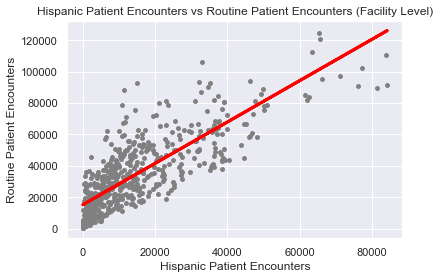

In [26]:
# Plot prediction on test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_pred, color='red', linewidth =3)
plot_test.title('Hispanic Patient Encounters vs Routine Patient Encounters (Facility Level)')
plot_test.xlabel('Hispanic Patient Encounters')
plot_test.ylabel('Routine Patient Encounters')
plot_test.show()

**Comment**

I think the line fits the data well but not optimally. Variability increases about the 20000 point for hispanic patients. There is higher variability above the fitted line. 

In [27]:
#Performance Evaluation

mse = mean_squared_error(y_test, y_pred) # This is the mean squared error
r2 = r2_score(y_test, y_pred) # This is the R2 score. 

print('Slope:' ,model.coef_)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Slope: [[1.31552062]]
Mean squared error:  190978228.1474403
R2 score:  0.6322140022346596


In [28]:
# Compare predicted y values to actual values in the dataframe
df_compare = pd.DataFrame({"Actual": y_test.flatten(), 'Predicted': y_pred.flatten()})

df_compare.head(20)

,Actual,Predicted
0,88430.0,30250.674627
1,20780.0,23495.476220
2,37632.0,61477.187694
3,22146.0,24804.419241
4,9895.0,24092.722583
5,63838.0,49979.537435
6,10935.0,24713.648318
7,93183.0,57670.071006
8,4042.0,17576.948929
9,9280.0,21222.256580


**Comment**

**Model Performance**
The model did not perform well. Firstly, the MSE result is a concern, one possibility can be the large variability in two areas in the scatterplot. Secondly, the R2 scores suggest that the model explains 63% of the variability in the dataset but this is makes me suspicious since the MSE is very high. 


**Reflections**

As mentioned before, the data set is limited to facility level. The hispanic column hould be combined with race groups to form a categorical variable. However, this will lead to categorical data being used as the predictor for a simple linear regression model, which is not ideal. There may have been some bias in the data collection process and some exlusion bias with the other race groups based on how the data was structured. 

Because of these bias, a better alternative may be to get additional data about patient encounters by race groups and their individual encounters for each disposition/ dishargce condition. This is a limitation that cannot be overcome due to ethical concerns during data collection.

